<a href="https://colab.research.google.com/github/BIVIN-KANNAN/Assignments/blob/main/Case_study_on_Unsupervised_learning_Bivin_k_k_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [154]:
wine = pd.read_csv('/content/Wine_clust.csv')

In [155]:
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [156]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [157]:
wine.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [158]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [159]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [160]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

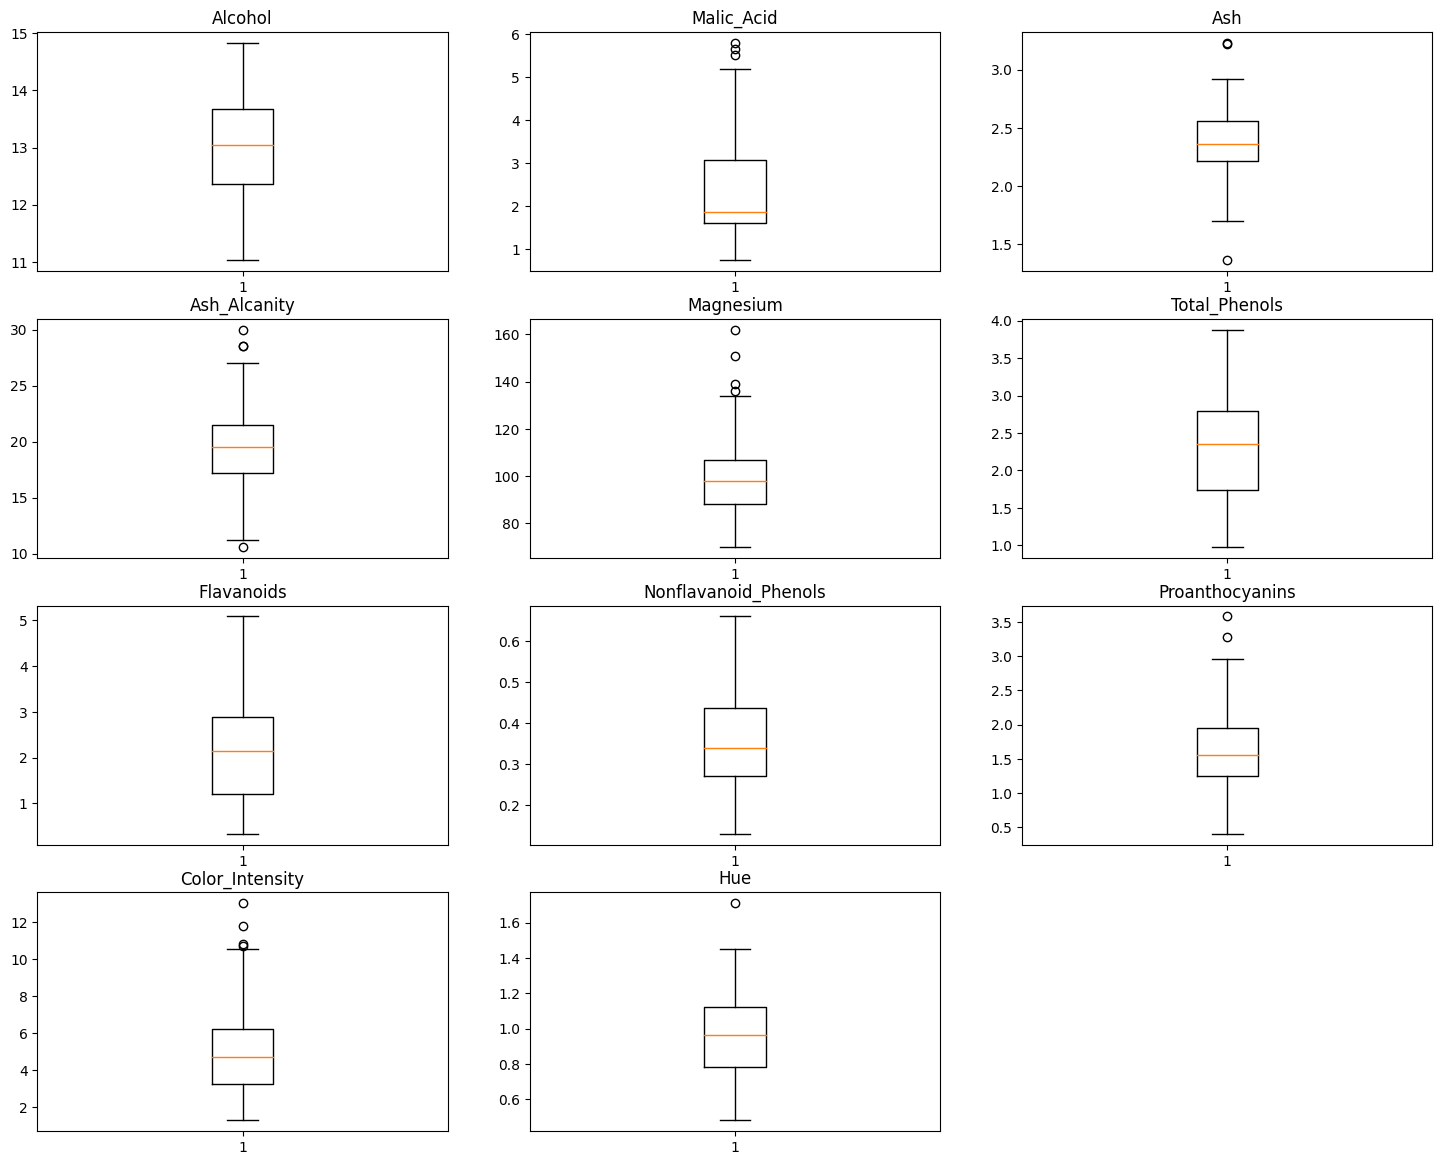

In [161]:
#Checking for the number of outliers through boxplot
plt.figure(figsize=(18,18))
for index, column in zip(range(1,12),wine.columns):
    plt.subplot(5,3,index)
    plt.boxplot( wine[column])
    plt.title(column)

**plotting a heatmap**

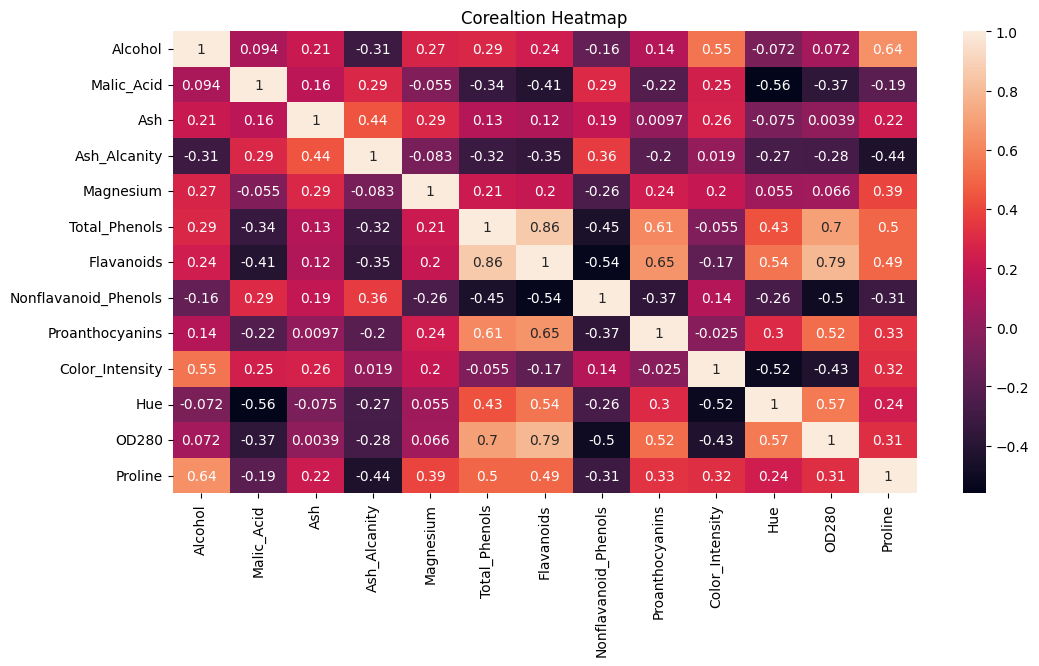

In [162]:
sns.heatmap(wine.corr(), annot=True)
plt.title("Corealtion Heatmap")
plt.show()

**k means clustering**

In [163]:
from sklearn.cluster import KMeans

In [164]:
x = wine.iloc[:,[9,10]].values

In [165]:
x

array([[ 5.64    ,  1.04    ],
       [ 4.38    ,  1.05    ],
       [ 5.68    ,  1.03    ],
       [ 7.8     ,  0.86    ],
       [ 4.32    ,  1.04    ],
       [ 6.75    ,  1.05    ],
       [ 5.25    ,  1.02    ],
       [ 5.05    ,  1.06    ],
       [ 5.2     ,  1.08    ],
       [ 7.22    ,  1.01    ],
       [ 5.75    ,  1.25    ],
       [ 5.      ,  1.17    ],
       [ 5.6     ,  1.15    ],
       [ 5.4     ,  1.25    ],
       [ 7.5     ,  1.2     ],
       [ 7.3     ,  1.28    ],
       [ 6.2     ,  1.07    ],
       [ 6.6     ,  1.13    ],
       [ 8.7     ,  1.23    ],
       [ 5.1     ,  0.96    ],
       [ 5.65    ,  1.09    ],
       [ 4.5     ,  1.03    ],
       [ 3.8     ,  1.11    ],
       [ 3.93    ,  1.09    ],
       [ 3.52    ,  1.12    ],
       [ 3.58    ,  1.13    ],
       [ 4.8     ,  0.92    ],
       [ 3.95    ,  1.02    ],
       [ 4.5     ,  1.25    ],
       [ 4.7     ,  1.04    ],
       [ 5.7     ,  1.19    ],
       [ 6.9     ,  1.09    ],
       [

In [166]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [167]:
wcss

[960.5248989229221,
 322.9566136319561,
 144.8026645222896,
 87.6330969518731,
 60.444901731211125,
 45.44343877622026,
 34.74643660857712,
 28.78593371287169,
 23.935466287437368,
 20.122823632697482]

Text(0, 0.5, 'wcss')

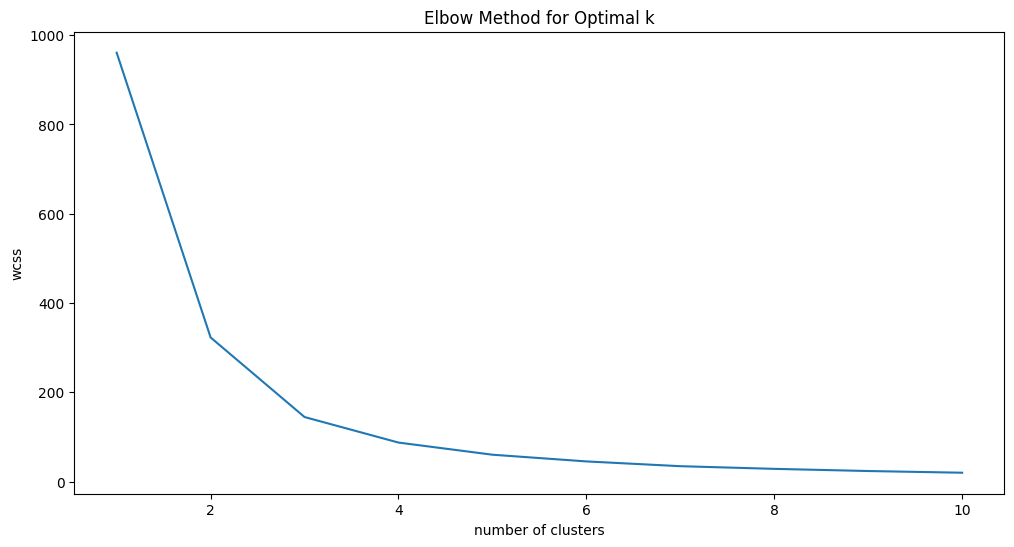

In [168]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method for Optimal k")
plt.xlabel('number of clusters')
plt.ylabel('wcss')



In [169]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [170]:
y_kmeans=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


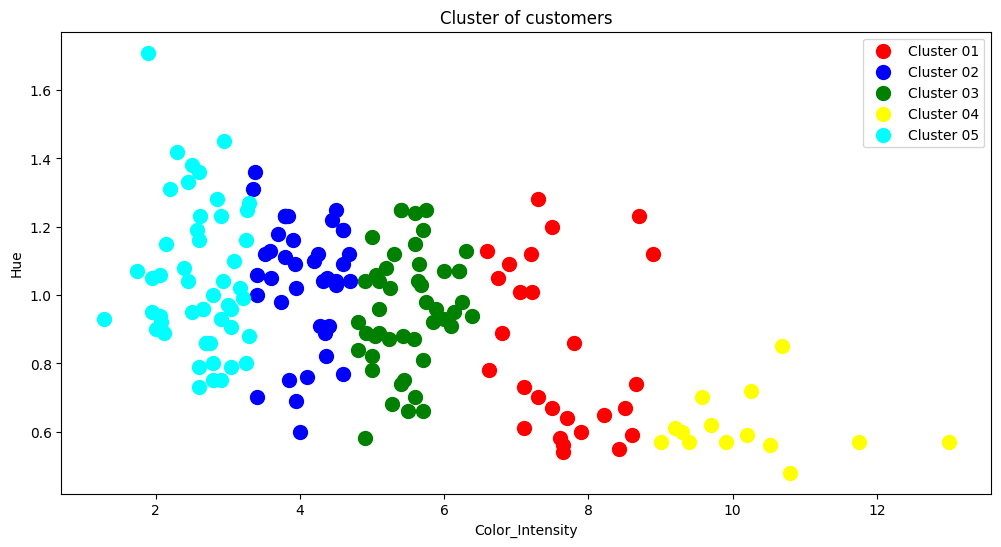

In [171]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 01')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 02')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 03')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='yellow',label='Cluster 04')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='cyan',label='Cluster 05')
plt.title('Cluster of customers')
plt.xlabel('Color_Intensity')
plt.ylabel('Hue')
plt.legend()

In [172]:
from sklearn.metrics import silhouette_score

In [173]:
silhouette_score = silhouette_score(x,y_kmeans)
silhouette_score

0.5100359860158687

**Agglomarative clustering**

In [174]:
from sklearn.cluster import AgglomerativeClustering

In [175]:
from sklearn.preprocessing import StandardScaler

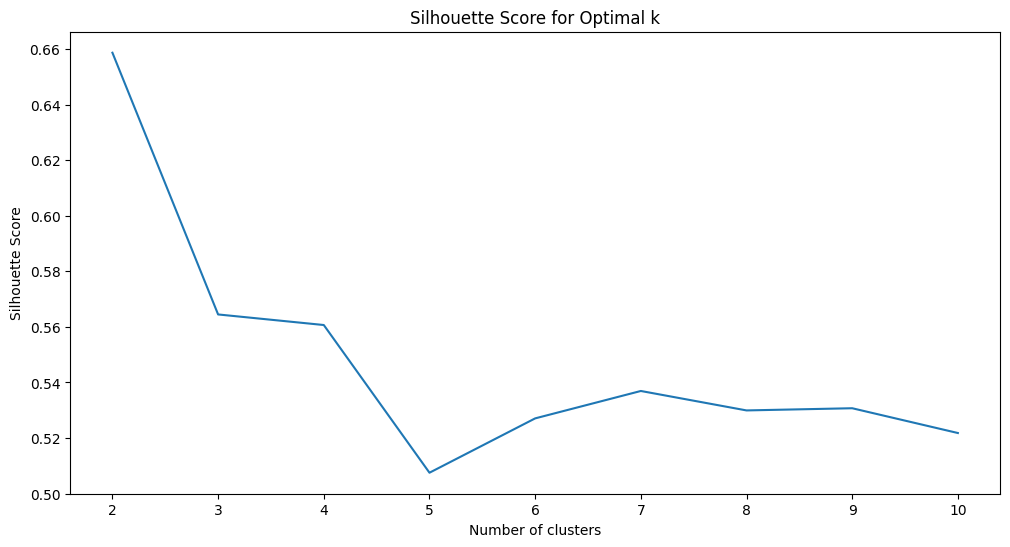

In [176]:
# Import necessary modules
from sklearn.metrics import silhouette_score

# Initialize empty list to store silhouette scores
silhouette_scores = []

# Loop through different values of k
for k in range(2, 11):
    # Create an AgglomerativeClustering model with k clusters
    agg_clustering = AgglomerativeClustering(n_clusters=k)

    # Fit the model to the data and predict cluster labels
    cluster_labels = agg_clustering.fit_predict(wine)

    # Calculate the silhouette score for the current k
    silhouette_scores.append(silhouette_score(wine, cluster_labels))

# Plot the silhouette scores for different values of k
plt.figure()
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

# Choose the optimal number of clusters based on the highest silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

# Fit the Agglomerative Clustering model with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clustering.fit(wine)

# Add cluster labels to the original dataset
wine["cluster_labels_agg"] = agg_clustering.labels_

**Dendrogram**

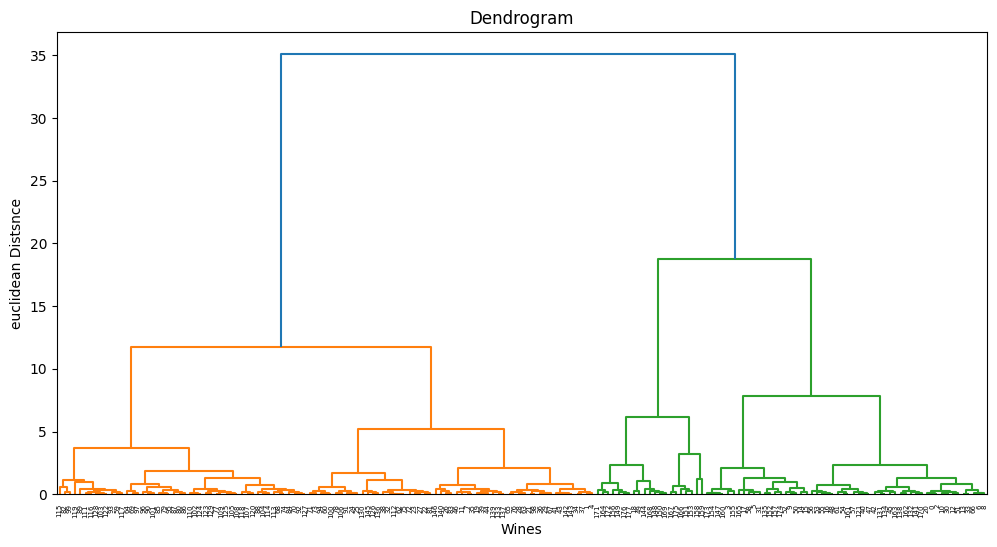

In [177]:
#optimum number ofclusters need using Dendrogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('euclidean Distsnce')
plt.show()

In [178]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,metric ='euclidean',linkage= 'ward')
y_hc = hc.fit_predict(x)

In [179]:
y_hc

array([2, 1, 2, 4, 1, 4, 2, 1, 2, 4, 2, 1, 2, 2, 4, 4, 2, 4, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 0, 4, 2, 4, 2, 2, 2, 2, 2, 4, 3, 1, 2, 1, 1, 3, 1,
       2, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 2,
       2, 1, 2, 4, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 4, 0, 0, 0, 0, 4, 0,
       4, 4, 0, 4, 0, 0, 4, 2, 2, 2, 0, 4, 0, 0, 0, 0, 2, 0, 0, 4, 4, 0,
       0, 0])

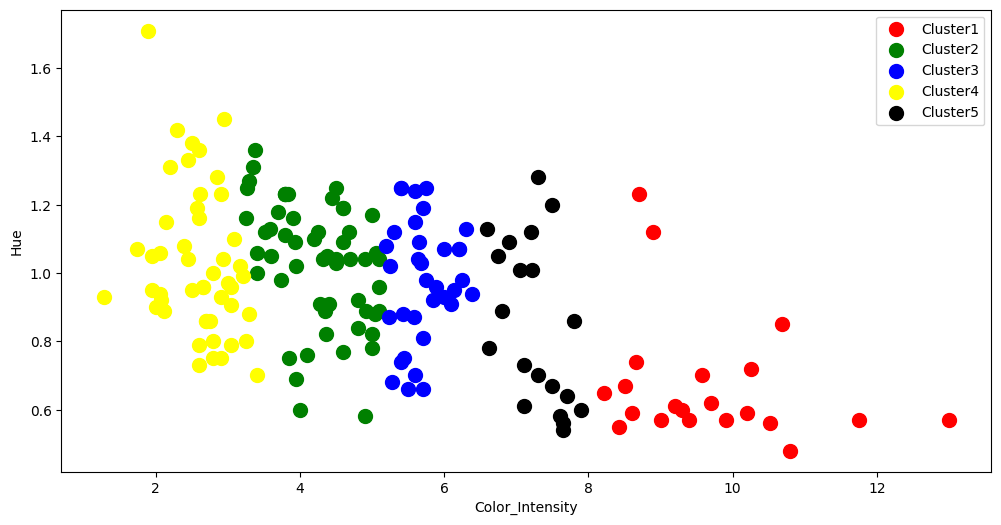

In [180]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='green',label='Cluster2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='blue',label='Cluster3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='yellow',label='Cluster4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='black',label='Cluster5')
plt.xlabel('Color_Intensity')
plt.ylabel('Hue')
plt.legend()
plt.show()

In [181]:
silhouette_score_den = silhouette_score(x,y_hc)
silhouette_score_den

0.4761650074537725

**PCA(principal component analysis)**

In [182]:
from sklearn.decomposition import PCA

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_data = sc.fit_transform(wine)

In [184]:
sc_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893,  1.64570147],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152,  1.64570147],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818,  1.64570147],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537, -0.60764362],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784, -0.60764362],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041, -0.60764362]])

In [185]:
sc_data = pd.DataFrame(sc_data,columns=wine.columns)
sc_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_labels_agg
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16,1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00,-6.076436e-01
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01,-6.076436e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01,-6.076436e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01,1.645701e+00
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00,1.645701e+00


In [186]:
pca=PCA().fit(sc_data)

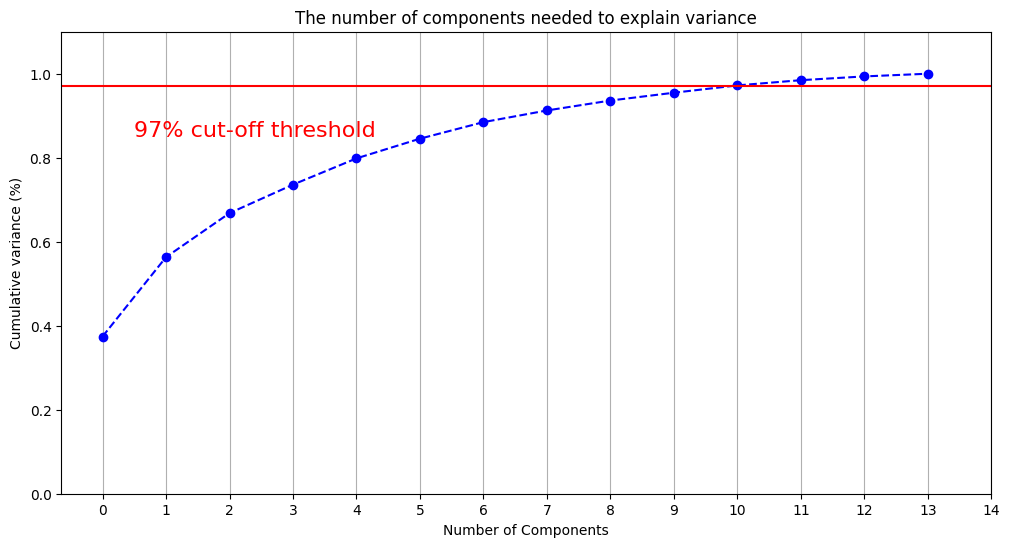

In [187]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 15, step=1)
y = np.cumsum(pca.explained_variance_ratio_)


plt.ylim(0.0,1.1)
plt.plot(range(len(y)), y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [188]:
pca=PCA(n_components=12)
pca.fit(sc_data)
x_pca=pca.transform(sc_data)

In [189]:
x_pca

array([[ 3.77210925, -1.20916975, -0.05850806, ...,  0.83671344,
         0.83974507, -0.34444882],
       [ 2.6431522 ,  0.22493181, -2.1244672 , ...,  0.01676077,
         0.18722535, -0.25085576],
       [ 2.98203392, -0.91937464,  0.99437571, ..., -0.61116592,
         0.49127349,  0.0340314 ],
       ...,
       [-2.50484715, -2.94646419, -0.75783671, ..., -0.00685569,
        -0.43595226, -0.80297956],
       [-2.2652567 , -2.45781556, -0.41862182, ...,  0.4680266 ,
         0.17161783, -0.45233411],
       [-3.01661847, -3.0037858 ,  1.10215983, ...,  0.17616126,
        -0.09589454,  0.27411723]])

In [190]:
len(x_pca)

178

In [191]:
len(x_pca[0])

12

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

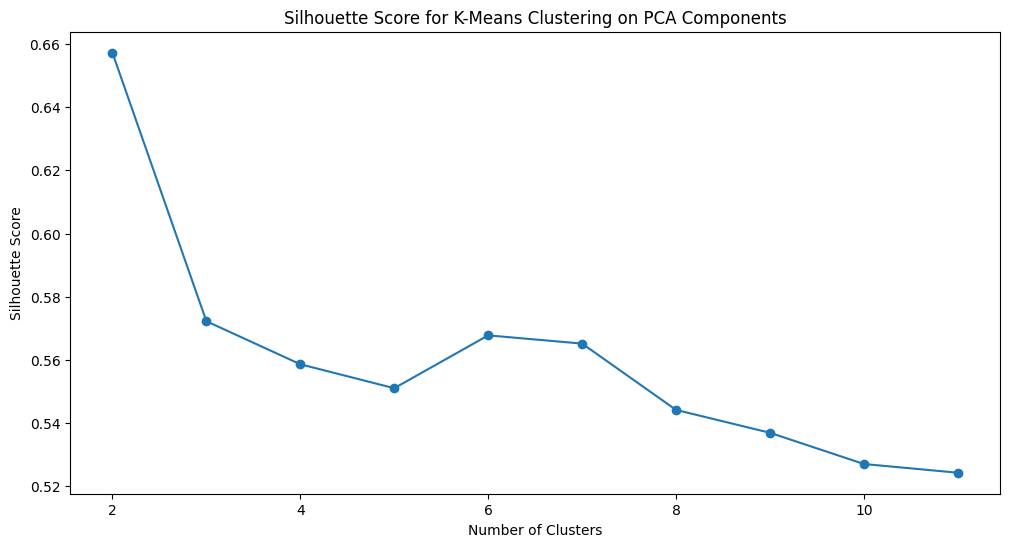

Optimal number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [192]:
# Create a range of clusters to try
cluster_range = range(2, 12)

# List to store silhouette scores for each cluster
silhouette_scores = []
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine)

# Fit K-Means for each cluster and compute silhouette score
for num_clusters in cluster_range:
    kmeans_pca = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_pca.fit(wine_pca)
    cluster_labels = kmeans_pca.labels_

    # Compute silhouette score
    silhouette_avg = silhouette_score(wine_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering on PCA Components')
plt.show()

# Determine the optimal number of clusters based on the silhouette score
optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_num_clusters)

# Fit K-Means with the optimal number of clusters
kmeans_pca_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans_pca_optimal.fit(wine_pca)

# Add cluster labels to the original dataset
wine["cluster_labels_kmeans_pca"] = kmeans_pca_optimal.labels_

**DB scan clustering**

In [193]:
from sklearn.cluster import DBSCAN

In [194]:
#choosing the best value for eps and min_samples
eps_values = np.arange(1,37)
min_samples_values = np.arange(2,25)

best_score = -1
best_eps = None
best_min_samples=None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(wine.values)
        if len(np.unique(clusters)) > 1:
            silhouette_average = silhouette_score(wine.values, clusters)
            if silhouette_average > best_score:
                best_score = silhouette_average
                best_eps = eps
                best_min_samples = min_samples


print(f"Best silhouette score = {best_score}")
print(f"Best eps = {best_eps}")
print(f"Best min_samples = {best_min_samples}")

Best silhouette score = 0.5034425269517281
Best eps = 36
Best min_samples = 14
